## Load Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import re
import string


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [3]:
df = pd.read_csv('./adultdata/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
df.shape # lesser compared to data available online

(32561, 15)

In [5]:
# know the type of data available
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.isnull().sum()


## data is corrupted as it is not considering ?

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# unique values of all the features
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
### how to deal with ?

## Value Count Function

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [14]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [15]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [16]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

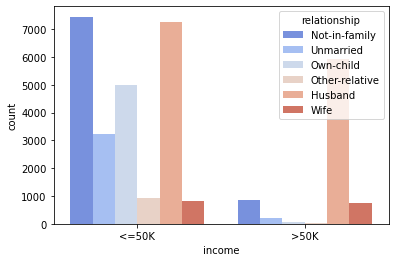

In [17]:
sns.countplot(df['income'],palette = 'coolwarm', hue = 'relationship', data = df);

## Filling ? values

In [18]:
# replace the values with mode

In [19]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-speciality')
df['native-country'] = df['native.country'].replace('?', 'United-States')

In [20]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

## Feature Engineering

In [21]:
# education category
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [22]:
# martial status
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital.status']  = df['marital.status'].replace(['Never-married'],'not-married')
df['marital.status'] = df['marital.status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'other')


In [36]:
# income

df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [37]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,90,Private,77053,high school,9,other,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,0,United-States
1,82,Private,132870,high school,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,United-States
2,66,Private,186061,higher,10,other,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,0,United-States
3,54,Private,140359,school,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,United-States
4,41,Private,264663,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,United-States
5,34,Private,216864,high school,9,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,United-States
6,38,Private,150601,school,6,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0,United-States
7,74,State-gov,88638,doc,16,not-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1,United-States
8,68,Federal-gov,422013,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0,United-States
9,41,Private,70037,higher,10,not-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1,United-States


In [38]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [39]:
df['marital.status'].value_counts()

married        14999
not-married    10683
other           6879
Name: marital.status, dtype: int64

In [40]:
df['education'].value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

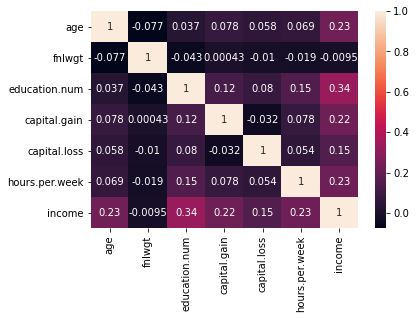

In [43]:
sns.heatmap(df.corr(), annot = True);

# Histogram

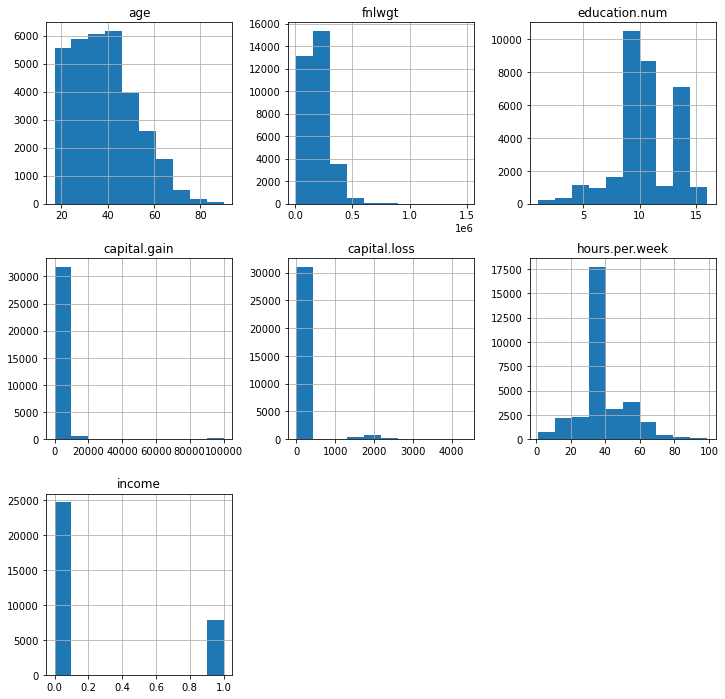

In [54]:
df.hist(figsize = (12,12),layout = (3,3), sharex = False);

# Booxplot

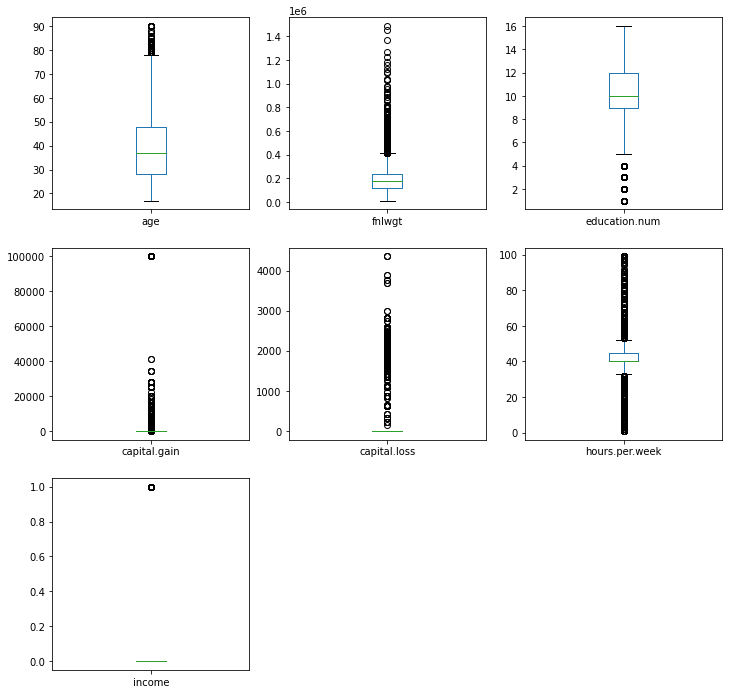

In [56]:
df.plot(kind = 'box', figsize = (12,12),layout = (3,3), sharex = False, subplots = True);

# Plotly

In [1]:
px.pie(df, values = 'education.num', names = 'education', title = '% of edu', 
       color_discrete_sequence= px.colors.qualitative.D3)

NameError: name 'px' is not defined

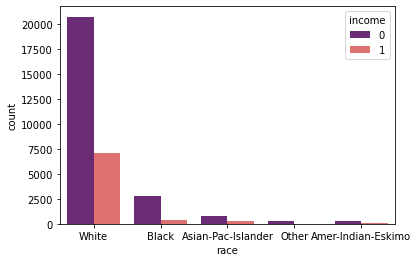

In [61]:
sns.countplot(df['race'], hue = 'income', data = df, palette = 'magma');

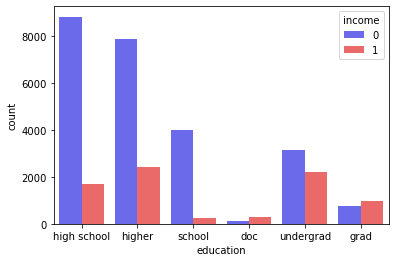

In [76]:
sns.countplot(df['education'], hue = 'income', data = df, palette = 'seismic');

# model building

In [77]:
X = df.drop(['income'], axis = 1)
y = df['income']

# feature scaling

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [81]:
df1  = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,39,0,38
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,39,0,38
2,49,3,11175,3,9,2,9,4,2,0,0,91,39,39,0,38
3,37,3,7009,4,3,2,6,4,4,0,0,90,39,39,0,38
4,24,3,16850,3,9,2,10,3,4,0,0,90,39,39,0,38


In [83]:
ss = StandardScaler().fit(df1.drop('income', axis = 1))

In [84]:
X = ss.transform(df1.drop('income', axis = 1))
y = df['income']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state =40)

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
model = lr.fit(X_trian, y_train)
prediction = model.predict(X_test)

print('Accuracy on training data:{:,.3f}'.format(lr.score(X_train,y_train)))
print('Accuracy on testing data: {:,.3f}'.format(lr.score(X_test, y_test)))

Accuracy on training data:0.839
Accuracy on testing data: 0.836


# Random forest classifier


In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1  = model1.predict(X_test)

print('Acc on training data: {}'.format(rfc.score(X_train, y_train)))
print('Acc on testing data: {}'.format(rfc.score(X_test, y_test)))

Acc on training data: 1.0
Acc on testing data: 0.8573037158358071
